<a href="https://colab.research.google.com/github/gilsonmjunior/geolocalizacaoDadosTSE/blob/main/eleicaoColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install rtree
!pip install spatial-access
!pip install geocoder
!pip install geolocator
!pip install -U googlemaps
!pip install descartes
!pip install geobr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 6.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 8.3 MB/s 
     |████████████████████████████████| 132 kB 33.1 MB/s 
     |████████████████████████████████| 1.0 MB 54.8 MB/s 
     |████████████████████████████████| 16.7 MB 48.9 MB/s 
     |████████████████████████████████| 6.3 MB 50.9 MB/s 
  Created wheel for atlas: filename=atlas-0.27.0-py3-none-any.whl size=48013 sha256=ff4fab5206d1fecda161d357f80f521ea0b770997ff40e5e5b28653008d95b13
  Stored in directory: /root/.cache/pip/wheels/03/de/34/5a43bd5301aa0862ca33611c66b7aaa8a761ec54c5f23b31ad
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=74017 sha256=d7cbcba9a6f204dfb0a77e5302b9f7673a513c9131daceabac4974c53c6846b6
  Stored in directory: /root/.ca

Importação das bibliotecas necessárias

In [4]:
import pandas as pd
import numpy as np
from shapely.geometry import Point

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Como a base de dados do TSE é muito extensa, usa-se uma lista com os nomes das colunas desejadas (consultadas na documentação da tabela).

In [6]:
columns = ['SG_UE','CD_MUNICIPIO','NM_MUNICIPIO','NR_ZONA', 'NR_SECAO', 'DS_CARGO','NR_VOTAVEL','NM_VOTAVEL', 'QT_VOTOS']

Leitura da base que contém as informações da votação aos cargos de: deputado estadual, deputado federal, governador e senador. Uso do comando "usecols" para capturar apenas as colunas que estão na lista.

In [7]:
votosNaoPresidente = pd.read_csv('/content/drive/MyDrive/eleicaoOsasco/votacao_secao_2022_SP.csv', encoding="ISO-8859-1", sep = ';', usecols=columns)

Filtro para resultados da cidade de osasco

In [8]:
votosOsascoNaoPresidente = votosNaoPresidente.loc[votosNaoPresidente['NM_MUNICIPIO'] == 'OSASCO']

In [9]:
votosOsascoNaoPresidente

,SG_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
15,SP,67890,OSASCO,332,168,GOVERNADOR,80,CAROLINA REJAILI VIGLIAR,2
92,SP,67890,OSASCO,276,270,GOVERNADOR,80,CAROLINA REJAILI VIGLIAR,2
98,SP,67890,OSASCO,277,197,GOVERNADOR,80,CAROLINA REJAILI VIGLIAR,4
105,SP,67890,OSASCO,277,188,GOVERNADOR,80,CAROLINA REJAILI VIGLIAR,3
138,SP,67890,OSASCO,277,99,GOVERNADOR,80,CAROLINA REJAILI VIGLIAR,3
...,...,...,...,...,...,...,...,...,...
18357152,SP,67890,OSASCO,277,74,DEPUTADO ESTADUAL,90033,MARIA DA GLORIA IBARRA DOS REIS,1
18357205,SP,67890,OSASCO,331,115,DEPUTADO ESTADUAL,90033,MARIA DA GLORIA IBARRA DOS REIS,1
18357212,SP,67890,OSASCO,331,57,DEPUTADO ESTADUAL,45647,FRANCISCO PEREIRA LIMA,1
18357362,SP,67890,OSASCO,332,131,DEPUTADO ESTADUAL,45647,FRANCISCO PEREIRA LIMA,1


Leitura da base com as informação de votação ao cargo de presidente.

In [10]:
columnsBR = ['SG_UE','CD_MUNICIPIO','NM_MUNICIPIO','NR_ZONA', 'NR_SECAO', 'DS_CARGO','NR_VOTAVEL','NM_VOTAVEL', 'QT_VOTOS']



In [11]:
votosPresidenteTSE = pd.read_csv('/content/drive/MyDrive/eleicaoOsasco/votacao_secao_2022_BR.csv', encoding="ISO-8859-1", sep = ';', usecols=columnsBR)

Filtro para a cidade de Osasco 

In [12]:
votosPresidente = votosPresidenteTSE.loc[votosPresidenteTSE['NM_MUNICIPIO'] == 'OSASCO']

In [13]:
votosPresidente

,SG_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
205,BR,67890,OSASCO,213,7,PRESIDENTE,15,SIMONE NASSAR TEBET,26
706,BR,67890,OSASCO,332,180,PRESIDENTE,15,SIMONE NASSAR TEBET,18
1306,BR,67890,OSASCO,277,121,PRESIDENTE,15,SIMONE NASSAR TEBET,30
1415,BR,67890,OSASCO,277,102,PRESIDENTE,15,SIMONE NASSAR TEBET,33
1499,BR,67890,OSASCO,331,80,PRESIDENTE,15,SIMONE NASSAR TEBET,11
...,...,...,...,...,...,...,...,...,...
3528696,BR,67890,OSASCO,213,56,PRESIDENTE,95,VOTO BRANCO,8
3528784,BR,67890,OSASCO,331,259,PRESIDENTE,95,VOTO BRANCO,6
3528941,BR,67890,OSASCO,315,166,PRESIDENTE,95,VOTO BRANCO,5
3529250,BR,67890,OSASCO,213,127,PRESIDENTE,95,VOTO BRANCO,3


In [14]:
votosPresidente['NM_VOTAVEL'].unique()

array(['SIMONE NASSAR TEBET', 'JAIR MESSIAS BOLSONARO',
       'KELMON LUIS DA SILVA SOUZA', 'LUIZ INÁCIO LULA DA SILVA',
       'VOTO NULO', 'CIRO FERREIRA GOMES', 'VOTO BRANCO',
       'VERA LUCIA PEREIRA DA SILVA SALGADO', 'SORAYA VIEIRA THRONICKE',
       'LUIZ FELIPE CHAVES D AVILA', 'SOFIA PADUA MANZANO',
       'LEONARDO PÉRICLES VIEIRA ROQUE', 'JOSE MARIA EYMAEL'],
      dtype=object)

Filtro para a cidade de Osasco.

As bases têm a mesma estrutura de colunas. Portanto, podemos realizar o empilhamento para reunir informações de votação de todos os cargos. Atenção ao número de linhas do cruzamento ser a soma das duas.


In [15]:
votosOsasco = pd.concat([votosOsascoNaoPresidente, votosPresidente], ignore_index=True)
votosOsasco

,SG_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
0,SP,67890,OSASCO,332,168,GOVERNADOR,80,CAROLINA REJAILI VIGLIAR,2
1,SP,67890,OSASCO,276,270,GOVERNADOR,80,CAROLINA REJAILI VIGLIAR,2
2,SP,67890,OSASCO,277,197,GOVERNADOR,80,CAROLINA REJAILI VIGLIAR,4
3,SP,67890,OSASCO,277,188,GOVERNADOR,80,CAROLINA REJAILI VIGLIAR,3
4,SP,67890,OSASCO,277,99,GOVERNADOR,80,CAROLINA REJAILI VIGLIAR,3
...,...,...,...,...,...,...,...,...,...
332621,BR,67890,OSASCO,213,56,PRESIDENTE,95,VOTO BRANCO,8
332622,BR,67890,OSASCO,331,259,PRESIDENTE,95,VOTO BRANCO,6
332623,BR,67890,OSASCO,315,166,PRESIDENTE,95,VOTO BRANCO,5
332624,BR,67890,OSASCO,213,127,PRESIDENTE,95,VOTO BRANCO,3


In [16]:
votosOsasco.to_excel('/content/drive/MyDrive/eleicaoOsasco/votosPresidenteNaoPresidente.xlsx')

In [17]:
votosOsascoTeste = votosOsasco.loc[votosOsasco['NM_VOTAVEL'] == 'LUIZ INÁCIO LULA DA SILVA']

In [18]:
votosOsascoTeste['QT_VOTOS'].sum()

201683

Leitura da base de seções eleitorais geolocalizadas.

In [19]:
columnsSecoes = ['NM_MUNICIPIO','NR_SECAO', 'NR_LATITUDE', 'NR_LONGITUDE','DS_ENDERECO', 'NM_BAIRRO', 'NR_CEP','NM_LOCAL_VOTACAO']
geolocalizacaoSecoes = pd.read_csv('/content/drive/MyDrive/eleicaoOsasco/eleitorado_local_votacao_2022.csv', encoding="ISO-8859-1", sep = ';', usecols=columnsSecoes)

In [20]:
geolocalizacaoSecoes = geolocalizacaoSecoes.loc[geolocalizacaoSecoes['NM_MUNICIPIO'] == 'OSASCO']


In [21]:
geolocalizacaoSecoes

,NM_MUNICIPIO,NR_SECAO,NM_LOCAL_VOTACAO,DS_ENDERECO,NM_BAIRRO,NR_CEP,NR_LATITUDE,NR_LONGITUDE
151,OSASCO,181,EE. PROF. JOSÉ JORGE,"RUA PINHEIRO, 70",CIDADE DAS FLORES,6184300,-23.537551,-46.807192
310,OSASCO,287,EMEF. MONSENHOR ELÍDIO MANTOVANI,"RUA NELSON MANDELA, 14",JARDIM PRIMEIRO DE MAIO,6147001,-23.574135,-46.809005
595,OSASCO,95,EE. ANTONIO DE ALMEIDA JUNIOR,"RUA CESAR LADEIRA, S/N",JARDIM VELOSO,6152010,-23.563639,-46.804918
1050,OSASCO,290,EMEF. OSCAR PENNACINO,"RUA JOSÉ GONÇALVES BRANCO, S/N",JARDIM CIPAVA II,6160150,-23.560319,-46.813594
1361,OSASCO,97,E.M.E.F. IRMÃ TECLA MERLO,"RUA TOPÁZIO, 08",JARDIM MUTINGA,6286240,-23.509104,-46.769660
...,...,...,...,...,...,...,...,...
991471,OSASCO,258,CEMEIEF DARCY RIBEIRO,"RUA JOSE AURELIANO DA CUNHA, 189",JARDIM MARIETA,6296200,-23.519002,-46.758041
991699,OSASCO,32,EE. PROFA. FANNY MONZONI SANTOS,"RUA DELFINO CERQUEIRA, 136",VILA YOLANDA,6120280,-23.545666,-46.792805
992506,OSASCO,183,EMEIEF. PADRE JOSÉ GROSSI DIAS,"RUA. AGOSTINHO NAVARRO, 925",JARDIM CONCEIÇÃO,6140000,-23.578906,-46.797747
992653,OSASCO,110,EE. DR. ANTONIO BRAZ GAMBARINI,"RUA ARNALDINA DOS SANTOS CORDEIRO, 45",CONJUNTO DOS METALURGICOS,6150580,-23.566110,-46.814381


Verificação dos dados de latitude com identificação de erro para resultados "-1" e seperação para tratamento.

In [22]:
len(geolocalizacaoSecoes['NR_SECAO'].unique())

366

In [23]:
geolocalizacaoSecoes['NR_LATITUDE'].unique()

array([-23.5375515 , -23.57413515, -23.56363937, -23.56031936,
       -23.5091045 , -23.5612327 , -23.5151934 , -23.5435886 ,
       -23.4993261 , -23.5418927 , -23.56465017, -23.50132   ,
       -23.5006449 , -23.4990021 , -23.55699168, -23.5050123 ,
       -23.55638761,  -1.        , -23.5499314 , -23.5495695 ,
       -23.54286576, -23.5035246 , -23.5063681 , -23.5772717 ,
       -23.56638408, -23.5078767 , -23.56187138, -23.545666  ,
       -23.558996  , -23.55544585, -23.5143449 , -23.55617214,
       -23.5174093 , -23.5177697 , -23.535541  , -23.5509214 ,
       -23.5255329 , -23.4790207 , -23.5477084 , -23.55569409,
       -23.5249453 , -23.5338269 , -23.4974052 , -23.5675707 ,
       -23.5190298 , -23.5125195 , -23.57703717, -23.4966338 ,
       -23.56913395, -23.4989701 , -23.5151025 , -23.54785537,
       -23.5710957 , -23.4925732 , -23.56669373, -23.55995146,
       -23.58360544, -23.5313973 , -23.56056   , -23.5204187 ,
       -23.5181322 , -23.5552797 , -23.5707689 , -23.53

In [24]:
latLongErro = geolocalizacaoSecoes[['NR_LATITUDE','NR_LONGITUDE','NR_SECAO','NM_LOCAL_VOTACAO','NR_CEP','DS_ENDERECO','NM_BAIRRO','NM_MUNICIPIO']]
latLongErro = latLongErro.loc[latLongErro['NR_LATITUDE'] == -1].drop_duplicates(subset=['NR_SECAO'])

In [25]:
latLongErro

,NR_LATITUDE,NR_LONGITUDE,NR_SECAO,NM_LOCAL_VOTACAO,NR_CEP,DS_ENDERECO,NM_BAIRRO,NM_MUNICIPIO
6062,-1.0,-1.0,199,CRECHE HILDA ALVES DOS SANTOS MARIM,6086060,"AVENIDA SANTO ANTONIO, 1042",JARDIM BELA VISTA,OSASCO
9108,-1.0,-1.0,157,EMEF JOSE MARTINIANO DE ALENCAR,6060210,"RUA JOAO DE DEUS, 382",JARDIM BELA VISTA,OSASCO
10101,-1.0,-1.0,99,EMEF. BENEDICTO WESCHENFELDER,6236060,"RUA RIO TOCANTIS, S/N",IAPI,OSASCO
10248,-1.0,-1.0,313,EMEF. PROF. MANOEL BARBOSA DE SOUZA,6266270,"RUA IVONE MAFRA PEREIRA DOS SANTOS, 88",VILA PORTAL D'OESTE,OSASCO
10646,-1.0,-1.0,14,COLEGIO FERNÃO DIAS PAES,6016030,"RUA EUCLIDES DA CUNHA, 70",CENTRO,OSASCO
...,...,...,...,...,...,...,...,...
857710,-1.0,-1.0,52,CENTRO UNIVERSITARIO UNIFIEO,6020190,"AVENIDA FRANZ VOEGELI, 300",PARQUE CONTINENTAL,OSASCO
862955,-1.0,-1.0,108,EE DEPUTADO GUILHERME DE OLIVEIRA GOMES,6075150,"RUA HIPOLITO DA SILVA, 36",JARDIM CIPAVA,OSASCO
879017,-1.0,-1.0,213,E.T.E. DE OSASCO,6233160,"RUA MANOEL RODRIGUES, 155",PRESIDENTE ALTINO,OSASCO
906068,-1.0,-1.0,40,CENTRO UNIVERSITARIO UNIFIEO,6020190,"AVENIDA FRANZ VOEGELI, 300",PARQUE CONTINENTAL,OSASCO


Unir ao nome de bairro e cidade e bairro para facilitar a obtenção dos dados.

In [26]:
latLongErro['enderecoCompleto'] =  latLongErro['DS_ENDERECO'] + ',' + \
                latLongErro['NM_BAIRRO'] + ',' + \
                latLongErro['NM_MUNICIPIO']



In [27]:
latLongErro 

,NR_LATITUDE,NR_LONGITUDE,NR_SECAO,NM_LOCAL_VOTACAO,NR_CEP,DS_ENDERECO,NM_BAIRRO,NM_MUNICIPIO,enderecoCompleto
6062,-1.0,-1.0,199,CRECHE HILDA ALVES DOS SANTOS MARIM,6086060,"AVENIDA SANTO ANTONIO, 1042",JARDIM BELA VISTA,OSASCO,"AVENIDA SANTO ANTONIO, 1042,JARDIM BELA VISTA,..."
9108,-1.0,-1.0,157,EMEF JOSE MARTINIANO DE ALENCAR,6060210,"RUA JOAO DE DEUS, 382",JARDIM BELA VISTA,OSASCO,"RUA JOAO DE DEUS, 382,JARDIM BELA VISTA,OSASCO"
10101,-1.0,-1.0,99,EMEF. BENEDICTO WESCHENFELDER,6236060,"RUA RIO TOCANTIS, S/N",IAPI,OSASCO,"RUA RIO TOCANTIS, S/N,IAPI,OSASCO"
10248,-1.0,-1.0,313,EMEF. PROF. MANOEL BARBOSA DE SOUZA,6266270,"RUA IVONE MAFRA PEREIRA DOS SANTOS, 88",VILA PORTAL D'OESTE,OSASCO,"RUA IVONE MAFRA PEREIRA DOS SANTOS, 88,VILA PO..."
10646,-1.0,-1.0,14,COLEGIO FERNÃO DIAS PAES,6016030,"RUA EUCLIDES DA CUNHA, 70",CENTRO,OSASCO,"RUA EUCLIDES DA CUNHA, 70,CENTRO,OSASCO"
...,...,...,...,...,...,...,...,...,...
857710,-1.0,-1.0,52,CENTRO UNIVERSITARIO UNIFIEO,6020190,"AVENIDA FRANZ VOEGELI, 300",PARQUE CONTINENTAL,OSASCO,"AVENIDA FRANZ VOEGELI, 300,PARQUE CONTINENTAL..."
862955,-1.0,-1.0,108,EE DEPUTADO GUILHERME DE OLIVEIRA GOMES,6075150,"RUA HIPOLITO DA SILVA, 36",JARDIM CIPAVA,OSASCO,"RUA HIPOLITO DA SILVA, 36,JARDIM CIPAVA,OSASCO"
879017,-1.0,-1.0,213,E.T.E. DE OSASCO,6233160,"RUA MANOEL RODRIGUES, 155",PRESIDENTE ALTINO,OSASCO,"RUA MANOEL RODRIGUES, 155,PRESIDENTE ALTINO,OS..."
906068,-1.0,-1.0,40,CENTRO UNIVERSITARIO UNIFIEO,6020190,"AVENIDA FRANZ VOEGELI, 300",PARQUE CONTINENTAL,OSASCO,"AVENIDA FRANZ VOEGELI, 300,PARQUE CONTINENTAL..."


Captura dos dados de georreferenciamento (latLong) com o a API do gooogle maps




In [28]:
import googlemaps

gmaps_key = googlemaps.Client(key="~digite sua key~")




In [29]:
latLongErro["NR_LATITUDE"] = None
latLongErro["NR_LONGITUDE"] = None

for i in range(0, len(latLongErro), 1):
  geocode_result = gmaps_key.geocode(latLongErro.iat[i,8])
  try: 
    lat = geocode_result[0]["geometry"]["location"]["lat"]
    lon = geocode_result[0]["geometry"]["location"]["lng"]
    latLongErro.iat[i, latLongErro.columns.get_loc('NR_LATITUDE')] = lat
    latLongErro.iat[i, latLongErro.columns.get_loc('NR_LONGITUDE')] = lon
  except:
    lat = None
    lon = None


In [30]:
latLongErroCorrigido = latLongErro[['NR_SECAO','NR_LATITUDE','NR_LONGITUDE']]

Merge com a base original de seções, introduzindo os dados corretos.

In [31]:
dadosGeoreferenciados = pd.merge(geolocalizacaoSecoes, latLongErroCorrigido, on='NR_SECAO', how='left')
dadosGeoreferenciados.drop_duplicates(subset=['NR_SECAO'], inplace=True)

In [32]:
dadosGeoreferenciados

,NM_MUNICIPIO,NR_SECAO,NM_LOCAL_VOTACAO,DS_ENDERECO,NM_BAIRRO,NR_CEP,NR_LATITUDE_x,NR_LONGITUDE_x,NR_LATITUDE_y,NR_LONGITUDE_y
0,OSASCO,181,EE. PROF. JOSÉ JORGE,"RUA PINHEIRO, 70",CIDADE DAS FLORES,6184300,-23.537551,-46.807192,-23.542858,-46.787526
1,OSASCO,287,EMEF. MONSENHOR ELÍDIO MANTOVANI,"RUA NELSON MANDELA, 14",JARDIM PRIMEIRO DE MAIO,6147001,-23.574135,-46.809005,-23.489469,-46.790198
2,OSASCO,95,EE. ANTONIO DE ALMEIDA JUNIOR,"RUA CESAR LADEIRA, S/N",JARDIM VELOSO,6152010,-23.563639,-46.804918,-23.540275,-46.787752
3,OSASCO,290,EMEF. OSCAR PENNACINO,"RUA JOSÉ GONÇALVES BRANCO, S/N",JARDIM CIPAVA II,6160150,-23.560319,-46.813594,-23.516193,-46.801186
4,OSASCO,97,E.M.E.F. IRMÃ TECLA MERLO,"RUA TOPÁZIO, 08",JARDIM MUTINGA,6286240,-23.509104,-46.769660,-23.540275,-46.787752
...,...,...,...,...,...,...,...,...,...,...
2107,OSASCO,349,E.E. JARDIM SANTA MARIA III,"RUA GANYMEDES JOSÉ, 155",JARDIM SANTA MARIA,6149213,-23.583605,-46.812817,NaN,NaN
2123,OSASCO,347,CEU. JOSÉ SARAMAGO,"AV. JOÃO DE ANDRADE, 1355",JARDIM SANTO ANTONIO,6132970,-23.556992,-46.800387,NaN,NaN
2236,OSASCO,346,E.E. JARDIM SANTA MARIA III,"RUA GANYMEDES JOSÉ, 155",JARDIM SANTA MARIA,6149213,-23.583605,-46.812817,NaN,NaN
2536,OSASCO,295,CENTRO EDUCACIONAL SESI 417,"AV GETÚLIO VARGAS, 401",JARDIM PIRATININGA,6233020,-23.514081,-46.787113,NaN,NaN


Verificação do número de seções únicas e substituição dos dados atualizados.

In [33]:
len(dadosGeoreferenciados['NR_SECAO'].unique())


366

In [34]:
dadosGeoreferenciados['NR_LATITUDE_x']=np.where(dadosGeoreferenciados['NR_LATITUDE_x'] == -1,dadosGeoreferenciados['NR_LATITUDE_y'], dadosGeoreferenciados['NR_LATITUDE_x'])
dadosGeoreferenciados['NR_LONGITUDE_x']=np.where(dadosGeoreferenciados['NR_LONGITUDE_x'] == -1, dadosGeoreferenciados['NR_LONGITUDE_y'], dadosGeoreferenciados['NR_LONGITUDE_x'])
dadosGeoreferenciados

,NM_MUNICIPIO,NR_SECAO,NM_LOCAL_VOTACAO,DS_ENDERECO,NM_BAIRRO,NR_CEP,NR_LATITUDE_x,NR_LONGITUDE_x,NR_LATITUDE_y,NR_LONGITUDE_y
0,OSASCO,181,EE. PROF. JOSÉ JORGE,"RUA PINHEIRO, 70",CIDADE DAS FLORES,6184300,-23.537551,-46.807192,-23.542858,-46.787526
1,OSASCO,287,EMEF. MONSENHOR ELÍDIO MANTOVANI,"RUA NELSON MANDELA, 14",JARDIM PRIMEIRO DE MAIO,6147001,-23.574135,-46.809005,-23.489469,-46.790198
2,OSASCO,95,EE. ANTONIO DE ALMEIDA JUNIOR,"RUA CESAR LADEIRA, S/N",JARDIM VELOSO,6152010,-23.563639,-46.804918,-23.540275,-46.787752
3,OSASCO,290,EMEF. OSCAR PENNACINO,"RUA JOSÉ GONÇALVES BRANCO, S/N",JARDIM CIPAVA II,6160150,-23.560319,-46.813594,-23.516193,-46.801186
4,OSASCO,97,E.M.E.F. IRMÃ TECLA MERLO,"RUA TOPÁZIO, 08",JARDIM MUTINGA,6286240,-23.509104,-46.76966,-23.540275,-46.787752
...,...,...,...,...,...,...,...,...,...,...
2107,OSASCO,349,E.E. JARDIM SANTA MARIA III,"RUA GANYMEDES JOSÉ, 155",JARDIM SANTA MARIA,6149213,-23.583605,-46.812817,NaN,NaN
2123,OSASCO,347,CEU. JOSÉ SARAMAGO,"AV. JOÃO DE ANDRADE, 1355",JARDIM SANTO ANTONIO,6132970,-23.556992,-46.800387,NaN,NaN
2236,OSASCO,346,E.E. JARDIM SANTA MARIA III,"RUA GANYMEDES JOSÉ, 155",JARDIM SANTA MARIA,6149213,-23.583605,-46.812817,NaN,NaN
2536,OSASCO,295,CENTRO EDUCACIONAL SESI 417,"AV GETÚLIO VARGAS, 401",JARDIM PIRATININGA,6233020,-23.514081,-46.787113,NaN,NaN


Verificação dos dados de latlong

In [35]:
dadosGeoreferenciados['NR_LATITUDE_x'].unique()

array([-23.5375515, -23.57413515, -23.56363937, -23.56031936, -23.5091045,
       -23.5612327, -23.5151934, -23.5435886, -23.4993261, -23.5418927,
       -23.56465017, -23.50132, -23.5006449, -23.4990021, -23.55699168,
       -23.5050123, -23.55638761, -23.5381089, -23.5499314, -23.5495695,
       -23.54286576, -23.5035246, -23.5063681, -23.5772717, -23.5078767,
       -23.55396, -23.56187138, -23.5131336, -23.55544585, -23.4894686,
       -23.5351802, -23.5143449, -23.5424013, -23.56638408, -23.55617214,
       -23.5174093, -23.5177697, -23.5509214, -23.5255329, -23.4790207,
       -23.5477084, -23.5249453, -23.5428578, -23.5338269, -23.4974052,
       -23.5675707, -23.4938689, -23.5251422, -23.4935485, -23.5190298,
       -23.535541, -23.5125195, -23.57703717, -23.4966338, -23.56913395,
       -23.4989701, -23.5151025, -23.54785537, -23.5710957, -23.4925732,
       -23.55995146, -23.5474569, -23.58360544, -23.5313973, -23.56056,
       -23.5204187, -23.5181322, -23.5552797, -23.52790

In [36]:
dadosGeoreferenciados = dadosGeoreferenciados.drop(['NR_LATITUDE_y', 'NR_LONGITUDE_y'], axis=1)
dadosGeoreferenciados = dadosGeoreferenciados.rename(columns={'NR_LATITUDE_x': 'LATITUDE', 'NR_LONGITUDE_x': 'LONGITUDE'})
dadosGeoreferenciados = dadosGeoreferenciados[['NR_SECAO','LATITUDE','LONGITUDE','NM_LOCAL_VOTACAO','DS_ENDERECO','NM_BAIRRO','NR_CEP']]



In [37]:
dadosGeoreferenciados

,NR_SECAO,LATITUDE,LONGITUDE,NM_LOCAL_VOTACAO,DS_ENDERECO,NM_BAIRRO,NR_CEP
0,181,-23.537551,-46.807192,EE. PROF. JOSÉ JORGE,"RUA PINHEIRO, 70",CIDADE DAS FLORES,6184300
1,287,-23.574135,-46.809005,EMEF. MONSENHOR ELÍDIO MANTOVANI,"RUA NELSON MANDELA, 14",JARDIM PRIMEIRO DE MAIO,6147001
2,95,-23.563639,-46.804918,EE. ANTONIO DE ALMEIDA JUNIOR,"RUA CESAR LADEIRA, S/N",JARDIM VELOSO,6152010
3,290,-23.560319,-46.813594,EMEF. OSCAR PENNACINO,"RUA JOSÉ GONÇALVES BRANCO, S/N",JARDIM CIPAVA II,6160150
4,97,-23.509104,-46.76966,E.M.E.F. IRMÃ TECLA MERLO,"RUA TOPÁZIO, 08",JARDIM MUTINGA,6286240
...,...,...,...,...,...,...,...
2107,349,-23.583605,-46.812817,E.E. JARDIM SANTA MARIA III,"RUA GANYMEDES JOSÉ, 155",JARDIM SANTA MARIA,6149213
2123,347,-23.556992,-46.800387,CEU. JOSÉ SARAMAGO,"AV. JOÃO DE ANDRADE, 1355",JARDIM SANTO ANTONIO,6132970
2236,346,-23.583605,-46.812817,E.E. JARDIM SANTA MARIA III,"RUA GANYMEDES JOSÉ, 155",JARDIM SANTA MARIA,6149213
2536,295,-23.514081,-46.787113,CENTRO EDUCACIONAL SESI 417,"AV GETÚLIO VARGAS, 401",JARDIM PIRATININGA,6233020


Criação dos pontos de geometria para cruzamento com polígonos das regionalizações do IBGE.

In [38]:
dadosGeoreferenciados["latlong"] = list(zip(dadosGeoreferenciados.LONGITUDE, dadosGeoreferenciados.LATITUDE))
dadosGeoreferenciados

,NR_SECAO,LATITUDE,LONGITUDE,NM_LOCAL_VOTACAO,DS_ENDERECO,NM_BAIRRO,NR_CEP,latlong
0,181,-23.537551,-46.807192,EE. PROF. JOSÉ JORGE,"RUA PINHEIRO, 70",CIDADE DAS FLORES,6184300,"(-46.8071922, -23.5375515)"
1,287,-23.574135,-46.809005,EMEF. MONSENHOR ELÍDIO MANTOVANI,"RUA NELSON MANDELA, 14",JARDIM PRIMEIRO DE MAIO,6147001,"(-46.80900472, -23.57413515)"
2,95,-23.563639,-46.804918,EE. ANTONIO DE ALMEIDA JUNIOR,"RUA CESAR LADEIRA, S/N",JARDIM VELOSO,6152010,"(-46.80491819, -23.56363937)"
3,290,-23.560319,-46.813594,EMEF. OSCAR PENNACINO,"RUA JOSÉ GONÇALVES BRANCO, S/N",JARDIM CIPAVA II,6160150,"(-46.81359359, -23.56031936)"
4,97,-23.509104,-46.76966,E.M.E.F. IRMÃ TECLA MERLO,"RUA TOPÁZIO, 08",JARDIM MUTINGA,6286240,"(-46.7696602, -23.5091045)"
...,...,...,...,...,...,...,...,...
2107,349,-23.583605,-46.812817,E.E. JARDIM SANTA MARIA III,"RUA GANYMEDES JOSÉ, 155",JARDIM SANTA MARIA,6149213,"(-46.81281715, -23.58360544)"
2123,347,-23.556992,-46.800387,CEU. JOSÉ SARAMAGO,"AV. JOÃO DE ANDRADE, 1355",JARDIM SANTO ANTONIO,6132970,"(-46.80038716, -23.55699168)"
2236,346,-23.583605,-46.812817,E.E. JARDIM SANTA MARIA III,"RUA GANYMEDES JOSÉ, 155",JARDIM SANTA MARIA,6149213,"(-46.81281715, -23.58360544)"
2536,295,-23.514081,-46.787113,CENTRO EDUCACIONAL SESI 417,"AV GETÚLIO VARGAS, 401",JARDIM PIRATININGA,6233020,"(-46.7871129, -23.5140813)"


In [39]:
dadosGeoreferenciados["latlong"] = dadosGeoreferenciados["latlong"].apply(Point)


In [40]:
import geopandas as gpd

In [41]:
dadosGeoreferenciados = gpd.GeoDataFrame(dadosGeoreferenciados,geometry='latlong')

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:34: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


In [42]:
dadosGeoreferenciados.to_file('/content/drive/MyDrive/eleicaoOsasco/dadosGeoreferenciados.shp')

In [43]:
dadosGeoreferenciadosOz = dadosGeoreferenciados
dadosGeoreferenciadosOz

,NR_SECAO,LATITUDE,LONGITUDE,NM_LOCAL_VOTACAO,DS_ENDERECO,NM_BAIRRO,NR_CEP,latlong
0,181,-23.537551,-46.807192,EE. PROF. JOSÉ JORGE,"RUA PINHEIRO, 70",CIDADE DAS FLORES,6184300,POINT (-46.80719 -23.53755)
1,287,-23.574135,-46.809005,EMEF. MONSENHOR ELÍDIO MANTOVANI,"RUA NELSON MANDELA, 14",JARDIM PRIMEIRO DE MAIO,6147001,POINT (-46.80900 -23.57414)
2,95,-23.563639,-46.804918,EE. ANTONIO DE ALMEIDA JUNIOR,"RUA CESAR LADEIRA, S/N",JARDIM VELOSO,6152010,POINT (-46.80492 -23.56364)
3,290,-23.560319,-46.813594,EMEF. OSCAR PENNACINO,"RUA JOSÉ GONÇALVES BRANCO, S/N",JARDIM CIPAVA II,6160150,POINT (-46.81359 -23.56032)
4,97,-23.509104,-46.76966,E.M.E.F. IRMÃ TECLA MERLO,"RUA TOPÁZIO, 08",JARDIM MUTINGA,6286240,POINT (-46.76966 -23.50910)
...,...,...,...,...,...,...,...,...
2107,349,-23.583605,-46.812817,E.E. JARDIM SANTA MARIA III,"RUA GANYMEDES JOSÉ, 155",JARDIM SANTA MARIA,6149213,POINT (-46.81282 -23.58361)
2123,347,-23.556992,-46.800387,CEU. JOSÉ SARAMAGO,"AV. JOÃO DE ANDRADE, 1355",JARDIM SANTO ANTONIO,6132970,POINT (-46.80039 -23.55699)
2236,346,-23.583605,-46.812817,E.E. JARDIM SANTA MARIA III,"RUA GANYMEDES JOSÉ, 155",JARDIM SANTA MARIA,6149213,POINT (-46.81282 -23.58361)
2536,295,-23.514081,-46.787113,CENTRO EDUCACIONAL SESI 417,"AV GETÚLIO VARGAS, 401",JARDIM PIRATININGA,6233020,POINT (-46.78711 -23.51408)


Cruzamento das seções georreferenciadas com a base concatenada de votação

In [58]:
votosGeorreferenciadosOZ = pd.merge(votosOsasco, dadosGeoreferenciadosOz, on='NR_SECAO', how='left')

In [59]:
votosGeorreferenciadosOZ

,SG_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,LATITUDE,LONGITUDE,NM_LOCAL_VOTACAO,DS_ENDERECO,NM_BAIRRO,NR_CEP,latlong
0,SP,67890,OSASCO,332,168,GOVERNADOR,80,CAROLINA REJAILI VIGLIAR,2,-23.515103,-46.779758,E.M.E.F. PROFª TEREZINHA MARTINS PEREIRA,"PRAÇA PROF. ANÉSIO CABRAL, S/N",JARDIM ROCHDALLE,6226010,POINT (-46.77976 -23.51510)
1,SP,67890,OSASCO,276,270,GOVERNADOR,80,CAROLINA REJAILI VIGLIAR,2,-23.519002,-46.758041,CEMEIEF DARCY RIBEIRO,"RUA JOSE AURELIANO DA CUNHA, 189",JARDIM MARIETA,6296200,POINT (-46.75804 -23.51900)
2,SP,67890,OSASCO,277,197,GOVERNADOR,80,CAROLINA REJAILI VIGLIAR,4,-23.525533,-46.811393,EMEI. PROVIDÊNCIA DOS ANJOS CARREIRA,"RUA FRANCISCO SGAMBATTI, 158",QUITAÚNA,6182040,POINT (-46.81139 -23.52553)
3,SP,67890,OSASCO,277,188,GOVERNADOR,80,CAROLINA REJAILI VIGLIAR,3,-23.542858,-46.787526,EMEE DR. EDMUNDO CAMPANHÃ BURJATO,"RUA THOMÁS ANTÔNIO GONZAGA, 310",JARDIM CIPAVA,6080130,POINT (-46.78753 -23.54286)
4,SP,67890,OSASCO,277,99,GOVERNADOR,80,CAROLINA REJAILI VIGLIAR,3,-23.513134,-46.790017,EMEF. BENEDICTO WESCHENFELDER,"RUA RIO TOCANTIS, S/N",IAPI,6236060,POINT (-46.79002 -23.51313)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332621,BR,67890,OSASCO,213,56,PRESIDENTE,95,VOTO BRANCO,8,-23.56056,-46.782178,EE. JOSÉ GERALDO VIEIRA,"AVENIDA PADRE VICENTE MELILLO, 1653",JARDIM ORIENTAL,6036018,POINT (-46.78218 -23.56056)
332622,BR,67890,OSASCO,331,259,PRESIDENTE,95,VOTO BRANCO,6,-23.518132,-46.770432,EE. PROF. FRANCISCO CASABONA,"RUA FRANCISCO HARO ALAMINOS, 276",VILA SÃO JOSÉ,6290050,POINT (-46.77043 -23.51813)
332623,BR,67890,OSASCO,315,166,PRESIDENTE,95,VOTO BRANCO,5,-23.512519,-46.765857,EE. CLAUDINEI GARCIA,"RUA ÁGUIA, 47",VILA AYROSA,6280130,POINT (-46.76586 -23.51252)
332624,BR,67890,OSASCO,213,127,PRESIDENTE,95,VOTO BRANCO,3,-23.567571,-46.787955,EE. JOSÉ RIBEIRO DE SOUZA,"RUA SÉRGIO CARDOSO, 15",JARDIM BUSSOCABA,6056420,POINT (-46.78796 -23.56757)


In [46]:
votosGeorreferenciadosOsascoTeste = votosGeorreferenciadosOZ.loc[votosGeorreferenciadosOZ['NM_VOTAVEL'] == 'LUIZ INÁCIO LULA DA SILVA']

In [47]:
votosGeorreferenciadosOsascoTeste['QT_VOTOS'].sum()

201683

Posto que já se tem os votos referenciados, é necessário importar os dados do IBGE de áreas ponderadas para se efetuar o cruzamento e, por polígono correspondente à área ponderada, verificar se os pontos gerados estão contidos nelas ou não.

In [48]:
import geobr
import geopandas as gpd
from geobr import read_weighting_area


In [49]:
areasPonderadas = geobr.read_weighting_area(year=2010)

/usr/local/lib/python3.7/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [89]:
areasPonderadasOz = areasPonderadas.loc[areasPonderadas['name_muni'] == 'Osasco']
areasPonderadasOz

,code_weighting,code_muni,name_muni,code_state,abbrev_state,code_region,name_region,geometry
7161,3534401005001,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"MULTIPOLYGON (((-46.80500 -23.48731, -46.79975..."
7162,3534401005003,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"MULTIPOLYGON (((-46.75144 -23.52541, -46.76828..."
7163,3534401005002,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"MULTIPOLYGON (((-46.77232 -23.51130, -46.77466..."
7164,3534401005005,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"MULTIPOLYGON (((-46.81230 -23.49944, -46.80692..."
7165,3534401005004,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"MULTIPOLYGON (((-46.80692 -23.49308, -46.80559..."
7166,3534401005007,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"MULTIPOLYGON (((-46.76535 -23.53312, -46.77118..."
7167,3534401005006,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"MULTIPOLYGON (((-46.79280 -23.51582, -46.80795..."
7168,3534401005009,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"MULTIPOLYGON (((-46.78817 -23.54233, -46.78726..."
7169,3534401005008,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"MULTIPOLYGON (((-46.81745 -23.53381, -46.81678..."
7172,3534401005010,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"MULTIPOLYGON (((-46.78028 -23.55595, -46.77583..."


Transformação dos dataframes para geodataframes

In [90]:
votosGeorreferenciadosOzGeoDF =  gpd.GeoDataFrame(votosGeorreferenciadosOZ, geometry='latlong')
areasPonderadasOzGeoDF =  gpd.GeoDataFrame(areasPonderadasOz, geometry='geometry')

In [91]:
from itertools import combinations


Remoção da sobreposição de polígonos e dos espaços em branco para a captação de todas as seções no cruzamento

In [92]:
areasPonderadasOzGeoDF.geometry = areasPonderadasOzGeoDF.geometry.buffer(0.0007)

poly = areasPonderadasOzGeoDF.geometry
for p1_idx, p2_idx in combinations(poly.index, 2):
    if poly.loc[p1_idx].intersects(poly.loc[p2_idx]):
       poly.loc[p2_idx] -= poly.loc[p1_idx]

        
areasPonderadasOzGeoDF["geometry"] = poly

areasPonderadasOzGeoDF

,code_weighting,code_muni,name_muni,code_state,abbrev_state,code_region,name_region,geometry
7161,3534401005001,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.80564 -23.48704, -46.80561 -23.4..."
7162,3534401005003,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.75114 -23.52605, -46.75121 -23.5..."
7163,3534401005002,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.77514 -23.50960, -46.77519 -23.5..."
7164,3534401005005,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.81291 -23.49978, -46.81294 -23.4..."
7165,3534401005004,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"MULTIPOLYGON (((-46.80626 -23.48851, -46.80626..."
7166,3534401005007,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.78872 -23.52495, -46.78868 -23.5..."
7167,3534401005006,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.80713 -23.51025, -46.80439 -23.5..."
7168,3534401005009,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.78858 -23.54290, -46.78863 -23.5..."
7169,3534401005008,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.81765 -23.53448, -46.81771 -23.5..."
7172,3534401005010,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.77437 -23.52990, -46.77159 -23.5..."


In [56]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1080

Teste de plotagem para verificação da remoção de espaços 

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/usr/local/lib/python3.7/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecate

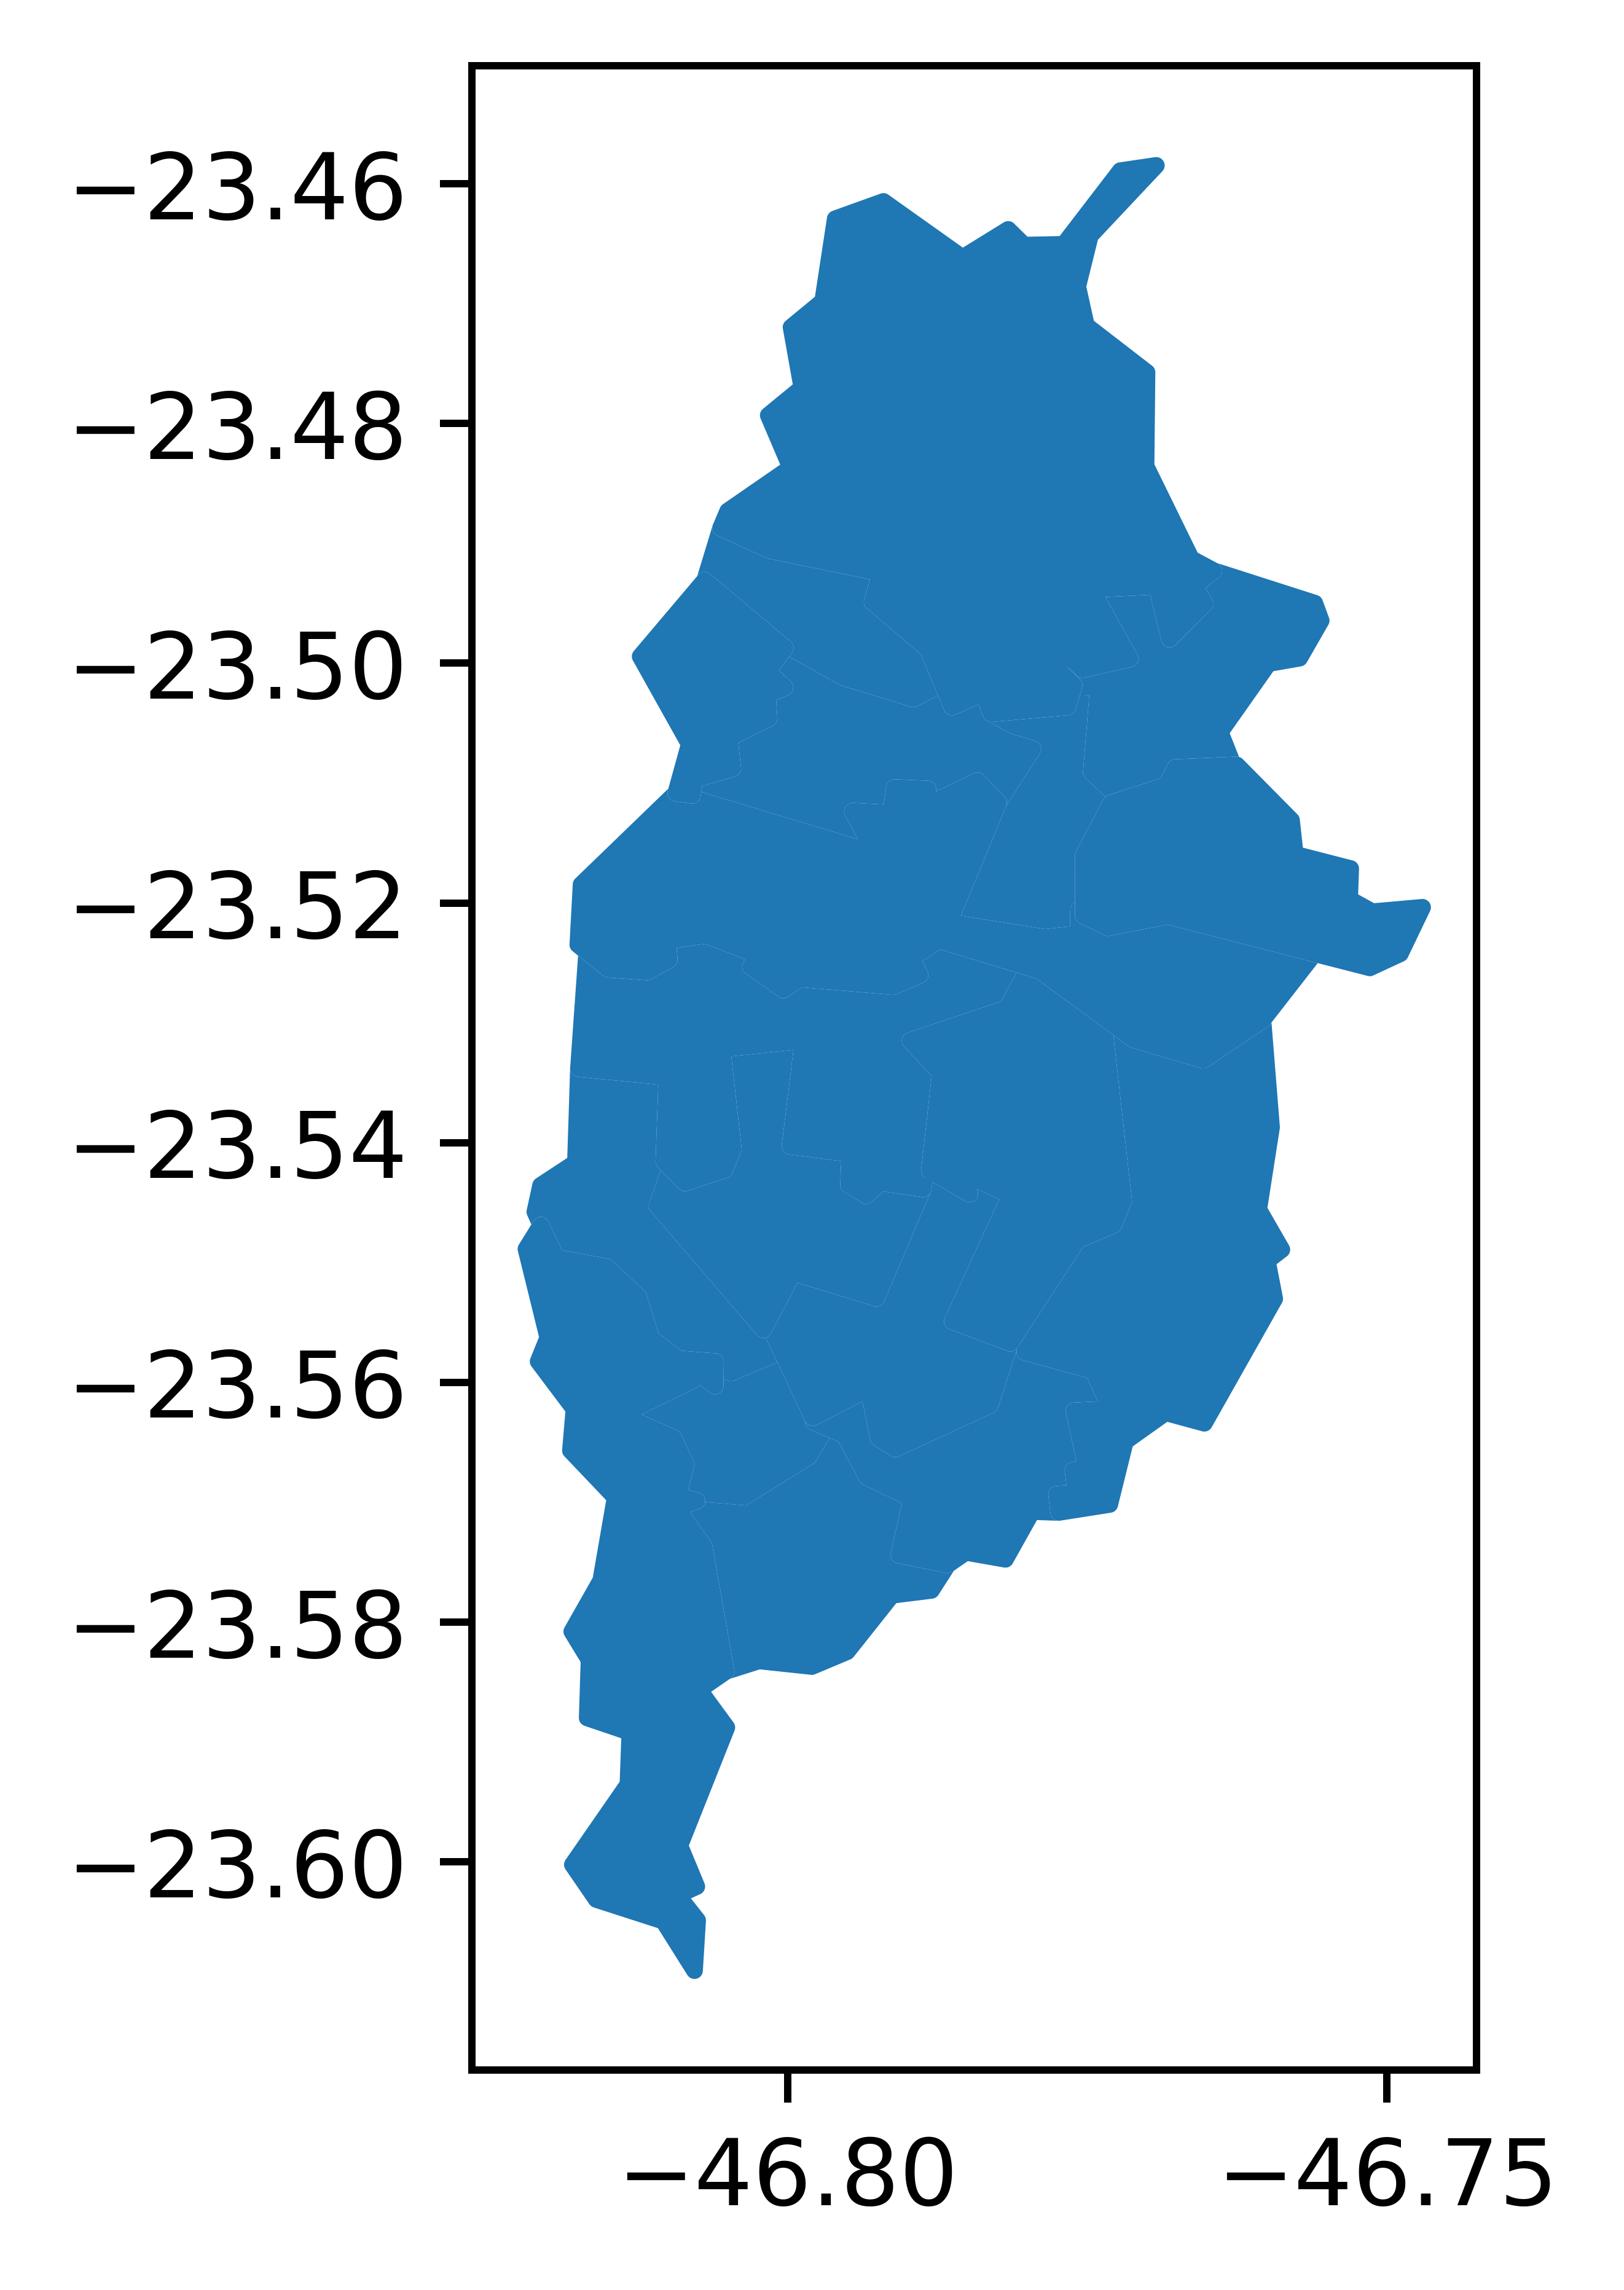

In [93]:
areasPonderadasOzGeoDF.plot()

Cruzamento para obtenção de quais pontos estão contidos nos polígonos. 

In [94]:
votosAreaPonderacaoOsasco = gpd.sjoin(areasPonderadasOzGeoDF,votosGeorreferenciadosOzGeoDF, op='contains')


In [95]:
votosAreaPonderacaoOsasco

,code_weighting,code_muni,name_muni,code_state,abbrev_state,code_region,name_region,geometry,index_right,SG_UE,...,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,LATITUDE,LONGITUDE,NM_LOCAL_VOTACAO,DS_ENDERECO,NM_BAIRRO,NR_CEP
7161,3534401005001,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.80564 -23.48704, -46.80561 -23.4...",302113,SP,...,DEPUTADO ESTADUAL,13113,MARCIA APARECIDA OVEJANEDA LIA,1,-23.497613,-46.768113,E.M.E.I.E.F. ÉLIO APARECIDO DA SILVA,"RUA ALMIRANTE TAMANDARÉ, 23",JARDIM PLATINA,6273090
7161,3534401005001,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.80564 -23.48704, -46.80561 -23.4...",270846,SP,...,DEPUTADO ESTADUAL,45123,ROGERIO NOGUEIRA LOPES CRUZ,1,-23.497613,-46.768113,E.M.E.I.E.F. ÉLIO APARECIDO DA SILVA,"RUA ALMIRANTE TAMANDARÉ, 23",JARDIM PLATINA,6273090
7161,3534401005001,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.80564 -23.48704, -46.80561 -23.4...",55205,SP,...,DEPUTADO FEDERAL,1578,CLEUSA RAMOS ZERBINI,3,-23.497613,-46.768113,E.M.E.I.E.F. ÉLIO APARECIDO DA SILVA,"RUA ALMIRANTE TAMANDARÉ, 23",JARDIM PLATINA,6273090
7161,3534401005001,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.80564 -23.48704, -46.80561 -23.4...",111381,SP,...,DEPUTADO FEDERAL,6565,ORLANDO SILVA DE JESUS JUNIOR,2,-23.497613,-46.768113,E.M.E.I.E.F. ÉLIO APARECIDO DA SILVA,"RUA ALMIRANTE TAMANDARÉ, 23",JARDIM PLATINA,6273090
7161,3534401005001,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.80564 -23.48704, -46.80561 -23.4...",227444,SP,...,DEPUTADO ESTADUAL,50000,PAULA NUNES DOS SANTOS,4,-23.497613,-46.768113,E.M.E.I.E.F. ÉLIO APARECIDO DA SILVA,"RUA ALMIRANTE TAMANDARÉ, 23",JARDIM PLATINA,6273090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7180,3534401005017,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.78298 -23.50491, -46.77656 -23.5...",257126,SP,...,DEPUTADO ESTADUAL,36051,ELIAS DOS SANTOS BITENCOURT,1,-23.515103,-46.779758,E.M.E.F. PROFª TEREZINHA MARTINS PEREIRA,"PRAÇA PROF. ANÉSIO CABRAL, S/N",JARDIM ROCHDALLE,6226010
7180,3534401005017,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.78298 -23.50491, -46.77656 -23.5...",304733,SP,...,DEPUTADO ESTADUAL,90000,NEZIO ANTONIO MONTEIRO FILHO,1,-23.515103,-46.779758,E.M.E.F. PROFª TEREZINHA MARTINS PEREIRA,"PRAÇA PROF. ANÉSIO CABRAL, S/N",JARDIM ROCHDALLE,6226010
7180,3534401005017,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.78298 -23.50491, -46.77656 -23.5...",308390,SP,...,DEPUTADO ESTADUAL,14038,PAULO HUGENNEYER KOGOS,2,-23.515103,-46.779758,E.M.E.F. PROFª TEREZINHA MARTINS PEREIRA,"PRAÇA PROF. ANÉSIO CABRAL, S/N",JARDIM ROCHDALLE,6226010
7180,3534401005017,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.78298 -23.50491, -46.77656 -23.5...",275370,SP,...,DEPUTADO ESTADUAL,19100,RICARDO LONGATTI FRANÇA,2,-23.515103,-46.779758,E.M.E.F. PROFª TEREZINHA MARTINS PEREIRA,"PRAÇA PROF. ANÉSIO CABRAL, S/N",JARDIM ROCHDALLE,6226010


Checagem do número de votos de um candidato para aferir a preservação dos dados


In [115]:
votosAreaPonderacaoOsascoTESTE = votosAreaPonderacaoOsasco.loc[votosAreaPonderacaoOsasco['NM_VOTAVEL']=='LUIZ INÁCIO LULA DA SILVA']
votosAreaPonderacaoOsascoTESTE['QT_VOTOS'].sum()


201683

Plotagem de mapa dos dados de um candidato por área ponderada

In [98]:
import folium

In [123]:
votosAreaPonderacaoOsascoTESTE = votosAreaPonderacaoOsascoTESTE.groupby(['code_weighting'])['QT_VOTOS'].sum().reset_index()
votosLula = votosAreaPonderacaoOsascoTESTE.merge(areasPonderadasOzGeoDF, on='code_weighting', how='left')
votosLula['code_weighting'] = votosLula['code_weighting'].apply(lambda x: str(x))


In [125]:
votosLula = gpd.GeoDataFrame(votosLula, crs="epsg:4386")
votosLula

,code_weighting,QT_VOTOS,code_muni,name_muni,code_state,abbrev_state,code_region,name_region,geometry
0,3534401005001,11077,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.80564 -23.48704, -46.80561 -23.4..."
1,3534401005002,12204,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.77514 -23.50960, -46.77519 -23.5..."
2,3534401005003,11524,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.75114 -23.52605, -46.75121 -23.5..."
3,3534401005004,3389,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"MULTIPOLYGON (((-46.80626 -23.48851, -46.80626..."
4,3534401005005,11708,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.81291 -23.49978, -46.81294 -23.4..."
5,3534401005006,8621,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.80713 -23.51025, -46.80439 -23.5..."
6,3534401005007,13837,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.78872 -23.52495, -46.78868 -23.5..."
7,3534401005008,14701,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.81765 -23.53448, -46.81771 -23.5..."
8,3534401005009,13415,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.78858 -23.54290, -46.78863 -23.5..."
9,3534401005010,11326,3534401.0,Osasco,35.0,SP,3.0,Sudeste,"POLYGON ((-46.77437 -23.52990, -46.77159 -23.5..."


In [ ]:
m = folium.Map(location=[-23.532881, -46.792004], zoom_start=11)

folium.Choropleth(
    geo_data=votosLula,
    data=votosLula,
    columns=['code_weighting','QT_VOTOS'],
    fill_color="Reds",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Votos Lula Osasco',
    key_on='feature.properties.code_weighting',
    reset=True,
).add_to(m)



In [130]:
m